# Auto regression example

In [2]:
# Auto Regression example - suitable for data without trend and seasonal component
from statsmodels.tsa.ar_model import AutoReg

# create a linear data
data = [10,12,14,16,18,20,20,22] #linear data 


Bad key "text.kerning_factor" on line 4 in
C:\Users\91920\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


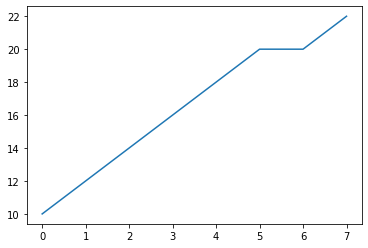

In [3]:
import matplotlib.pyplot as plt
plt.plot(data)

In [73]:
ARmodel = AutoReg(data, lags=1) #calling Auto regression model
ARmodel_fit = ARmodel.fit() #Fitting model

In [74]:
# making predictions
ypredicted = ARmodel_fit.predict(8,10)
print(ypredicted)

[23.125      24.14453125 25.06848145]


In [75]:
pred_list = ypredicted.tolist()
combinedlist = data+pred_list

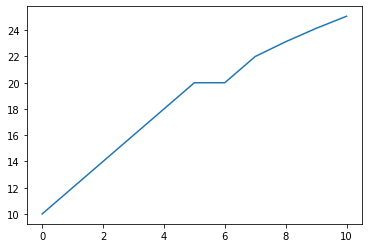

In [76]:
plt.plot(combinedlist)

# Moving average example

In [77]:
from statsmodels.tsa.arima_model import ARMA #suitable for data without trend and seasonality

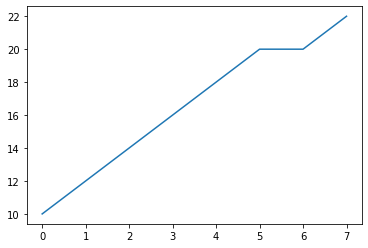

In [78]:
import matplotlib.pyplot as plt
plt.plot(data)

In [87]:
# fit model
MAmodel = ARMA(data, order=(0, 1)) #model with AR=0 and MA=1
MAmodel_fit = MAmodel.fit(disp=False)

In [88]:
# make prediction
ypredicted = MAmodel_fit.predict(8,10)
print(ypredicted)

[20.51275988 16.49884854 16.49884854]


In [89]:
pred_list = ypredicted.tolist()
combinedlist = data+pred_list

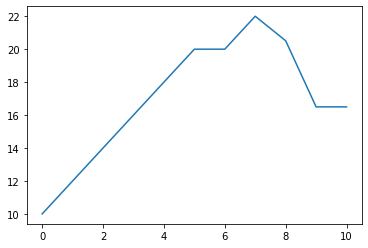

In [90]:
plt.plot(combinedlist)

# Autoregressive Moving Average (ARMA)

In [15]:
# Import Data -  Australian Drug Sales
import pandas as pd
DrugSalesData = pd.read_csv('C:/Users/91920/Downloads/TimeSeries.csv', parse_dates=['Date'], index_col='Date')

In [17]:
DrugSalesData

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869
...,...
2008-01-02,21.654285
2008-01-03,18.264945
2008-01-04,23.107677


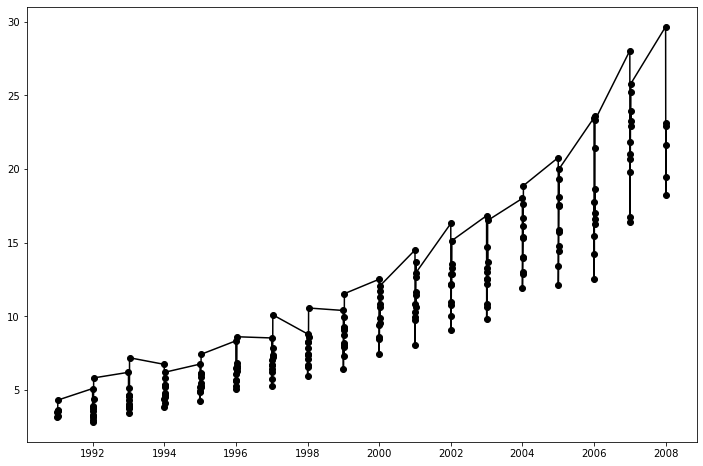

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(DrugSalesData, marker="o", color="black",label='Oringinal data')
plt.show()

In [91]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(DrugSalesData['Value'])
test_result 

(3.14518568930673,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364174)

In [99]:
DrugSalesData['Seasonal_Difference']=DrugSalesData['Value']-DrugSalesData['Value'].shift(1)
## Again test dickey fuller test
test_result=adfuller(DrugSalesData['Seasonal_Difference'].dropna())
test_result

(-2.495172147449673,
 0.11665341686470398,
 15,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 547.1880809726357)

In [40]:
DrugSalesData['Seasonal_Difference']=DrugSalesData['Value']-DrugSalesData['Value'].shift(8)
## Again test dickey fuller test
test_result=adfuller(DrugSalesData['Seasonal_Difference'].dropna())
test_result

(-4.495051811502679,
 0.00020072804791958012,
 15,
 180,
 {'1%': -3.4672111510631, '5%': -2.877734766803841, '10%': -2.575403364197531},
 518.1519503724882)

In [24]:
import statsmodels.api as sm

#from statsmodels.graphics.api import qqplot

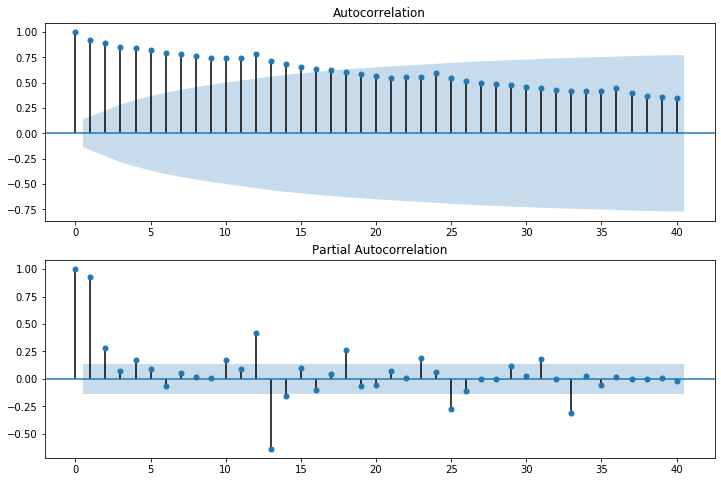

In [25]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(DrugSalesData['Value'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(DrugSalesData['Value'], lags=40, ax=ax2)

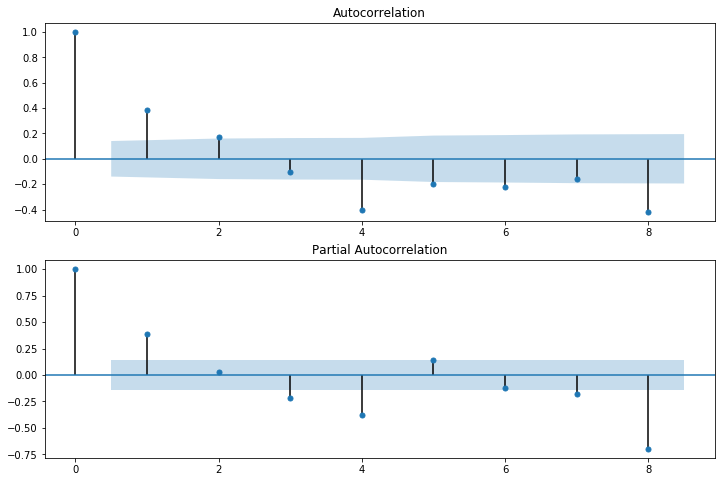

In [45]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(DrugSalesData['Seasonal_Difference'].dropna(), lags=8, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(DrugSalesData['Seasonal_Difference'].dropna(), lags=8, ax=ax2)

In [102]:

from statsmodels.tsa.arima_model import ARMA
# fit model
ARMAmodel = ARMA(DrugSalesData['Value'], order=(1, 1))
ARmodel_fit = ARMAmodel.fit(disp=False)

C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [103]:
actuals = DrugSalesData['Value'][200:204]
actuals

Date
2008-01-03    18.264945
2008-01-04    23.107677
2008-01-05    22.912510
2008-01-06    19.431740
Name: Value, dtype: float64

In [104]:
ypredicted = ARmodel_fit.predict(200,203)  # end point included
print(ypredicted)

Date
2008-01-03    24.439976
2008-01-04    21.945462
2008-01-05    22.341809
2008-01-06    22.503963
dtype: float64


In [105]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
#print(ARmodel_fit.aic)

MAE: 2.745043


In [60]:
import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(DrugSalesData['Value'],order=parameters)
        results = mod.fit()
        ypredicted = results.predict(200,203)  # end point included
        mae = mean_absolute_error(actuals, ypredicted)
        print('ARMA{} - MAE:{}'.format(parameters, mae))
        #print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

ARMA(0, 0) - MAE:10.234788417843136
ARMA(0, 1) - MAE:6.273327630994247
ARMA(0, 2) - MAE:5.2735154307356025
ARMA(0, 3) - MAE:4.777577781760413
ARMA(1, 0) - MAE:2.8253588034976946


C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(1, 1) - MAE:2.745042526407625


C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(1, 2) - MAE:2.4082091629451243


C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(1, 3) - MAE:2.9438936458322402
ARMA(2, 0) - MAE:3.675098904332777


C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', Va

ARMA(2, 1) - MAE:2.5187571883196256


C:\Users\91920\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(2, 2) - MAE:2.6313071869824967
ARMA(2, 3) - MAE:2.9444555225887683
ARMA(3, 0) - MAE:3.1497453501775006


C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', Va

ARMA(3, 1) - MAE:2.727552051990841
ARMA(3, 3) - MAE:2.7942654979093646


C:\Users\91920\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [62]:
ARMAmodel = ARMA(DrugSalesData['Value'], order=(1, 2))
ARmodel_fit = ARMAmodel.fit()
ypredicted = ARmodel_fit.predict(200,203)  # end point included
print(ypredicted)
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
print(ARmodel_fit.aic)

C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2008-01-03    22.957271
2008-01-04    21.658077
2008-01-05    23.093977
2008-01-06    22.741184
dtype: float64
MAE: 2.408209
869.2386494699966


We now calculate the Akaike Information Criterion (AIC), Schwarz Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC). Our goalis to choose a model that minimizes (AIC, BIC, HQIC).

In [172]:
# make prediction
ypredicted = ARmodel_fit.predict(len(DrugSalesData), len(DrugSalesData)+2)
print(ypredicted)

204    21.237080
205    21.181942
206    21.127126
dtype: float64


In [66]:
import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(DrugSalesData['Seasonal_Difference'].dropna(),order=parameters)
        results = mod.fit()
        ypredicted = results.predict(210,213)  # end point included
        mae = mean_absolute_error(actuals, ypredicted)
        print('ARMA{} - MAE:{}'.format(parameters, mae))
        #print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91920\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\919

In [ ]:
DrugSalesData['Seasonal_Difference']

# Autoregressive Integrated Moving Average (ARIMA)

In [155]:
from statsmodels.tsa.arima_model import ARIMA

In [173]:
# fit model
ARIMAmodel = ARIMA(DrugSalesData['Value'], order=(1, 1, 1)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit(disp=False)

# make prediction
ypredicted = ARIMA_model_fit.predict(len(DrugSalesData), len(DrugSalesData)+2, typ='levels')
print(ypredicted)

203    21.584631
204    22.326892
205    22.626180
dtype: float64
